In [3]:
import pandas as pd

# Create a date range for quarterly data
date_range = pd.date_range(start='2019-01-01', periods=16, freq='Q')

# Sample quarterly cash flow data
cash_flow_data = [100, 120, 110, 130, 125, 140, 135, 150, 145, 160, 155, 175, 170, 190, 185, 200]

# Create a Pandas DataFrame with 'Date' as a regular column
df = pd.DataFrame({'Date': date_range, 'Cash_Flow': cash_flow_data})

# Display the DataFrame
print(df)


         Date  Cash_Flow
0  2019-03-31        100
1  2019-06-30        120
2  2019-09-30        110
3  2019-12-31        130
4  2020-03-31        125
5  2020-06-30        140
6  2020-09-30        135
7  2020-12-31        150
8  2021-03-31        145
9  2021-06-30        160
10 2021-09-30        155
11 2021-12-31        175
12 2022-03-31        170
13 2022-06-30        190
14 2022-09-30        185
15 2022-12-31        200


C:\Users\ChamindaDilhanBISTEC\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                     
Dep. Variable:                         Cash_Flow   No. Observations:                   16
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 4)   Log Likelihood                 -27.149
Date:                           Fri, 03 Nov 2023   AIC                             64.298
Time:                                   16:54:27   BIC                             66.288
Sample:                                        0   HQIC                            63.044
                                            - 16                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5268      1.946     -0.271      0.787      -4.342       3.288
ma.L1          0.1144      1.870      0.061

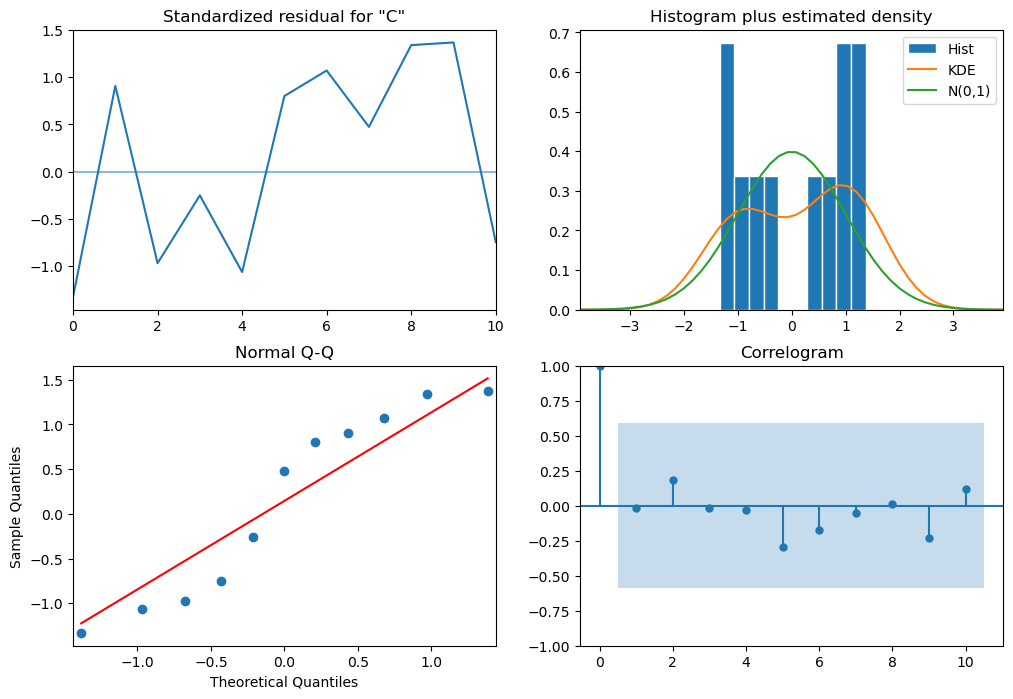

TypeError: unsupported operand type(s) for +: 'int' and 'DateOffset'

In [9]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Define the SARIMA order and seasonal order
order = (1, 1, 1)  # (p, d, q)
seasonal_order = (1, 1, 1, 4)  # (P, D, Q, s)

# Fit the SARIMA model
sarima_model = sm.tsa.SARIMAX(df['Cash_Flow'], order=order, seasonal_order=seasonal_order)
results = sarima_model.fit()

# Summary of the SARIMA model
print(results.summary())

# Plot the SARIMA model diagnostics
results.plot_diagnostics(figsize=(12, 8))
plt.show()

# Forecast future cash flows for the next year (four quarters)
forecast_periods = 4  # Number of future quarters to forecast

# Get the last date in the DataFrame
last_date = df.index[-1]

# Calculate the forecast start and end dates using pd.DateOffset
forecast_start_date = last_date + pd.DateOffset(months=3)
forecast_end_date = last_date + pd.DateOffset(months=12)

# Generate a date range for the forecast
forecast_index = pd.date_range(start=forecast_start_date, end=forecast_end_date, freq='Q')

# Forecast future values
forecast = results.get_forecast(steps=forecast_periods, index=forecast_index)

# Get the forecasted values and confidence intervals
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()

# Display the forecasted cash flows and confidence intervals
forecast_df = pd.DataFrame({'Forecast': forecast_mean}, index=forecast_index)
forecast_ci_df = pd.DataFrame({'Lower_CI': forecast_ci.iloc[:, 0], 'Upper_CI': forecast_ci.iloc[:, 1]}, index=forecast_index)

print("Forecasted Cash Flows:")
print(forecast_df)

print("Confidence Intervals:")
print(forecast_ci_df)

# Plot the forecasted values with confidence intervals
plt.figure(figsize=(12, 6))
plt.plot(df['Cash_Flow'], label='Observed')
plt.plot(forecast_df['Forecast'], label='Forecast', color='red')
plt.fill_between(forecast_index, forecast_ci_df['Lower_CI'], forecast_ci_df['Upper_CI'], color='pink')
plt.legend(loc='upper left')
plt.title('SARIMA Forecast for the Next Year')
plt.show()


C:\Users\ChamindaDilhanBISTEC\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\ChamindaDilhanBISTEC\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


         Date  Cash_Flow_type1  Cash_Flow_type2  Cash_Flow_type1_Predicted  \
0  2019-03-31              100               10                        NaN   
1  2019-06-30              120               12                        NaN   
2  2019-09-30              110               11                        NaN   
3  2019-12-31              130               13                        NaN   
4  2020-03-31              125               12                        NaN   
5  2020-06-30              140               14                        NaN   
6  2020-09-30              135               13                        NaN   
7  2020-12-31              150               15                        NaN   
8  2021-03-31              145               14                        NaN   
9  2021-06-30              160               16                        NaN   
10 2021-09-30              155               15                        NaN   
11 2021-12-31              175               17                 

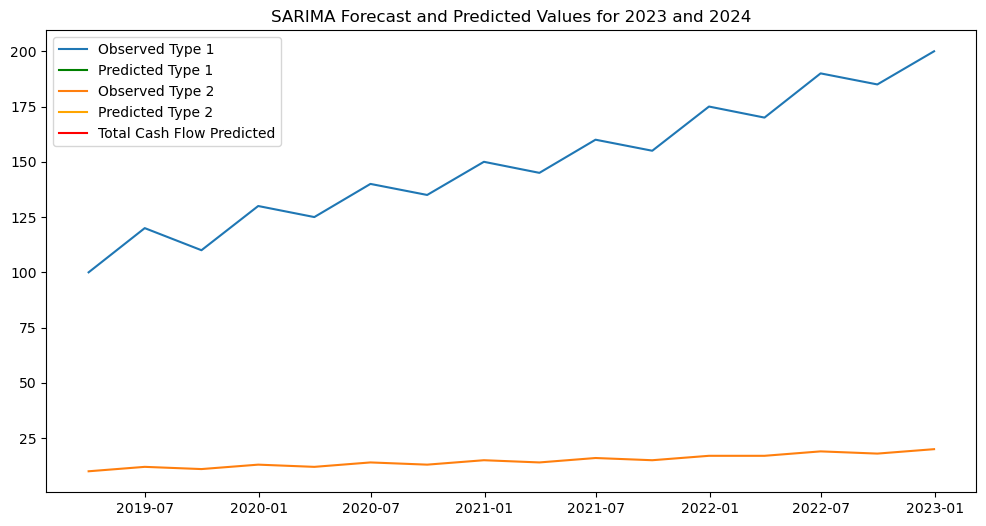

In [22]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from dateutil.relativedelta import relativedelta

# Create a Pandas DataFrame with your cash flow data and "Date" as the index column
# Include your actual cash flow data and dates here
data = {
    "Date": pd.date_range(start='2019-01-01', periods=16, freq='Q'),
    "Cash_Flow_type1": [100, 120, 110, 130, 125, 140, 135, 150, 145, 160, 155, 175, 170, 190, 185, 200],
    "Cash_Flow_type2": [10, 12, 11, 13, 12, 14, 13, 15, 14, 16, 15, 17, 17, 19, 18, 20]
}
df = pd.DataFrame(data)

# Drop rows with missing date values (NaT)
df = df.dropna(subset=['Date'])

# Define the SARIMA order and seasonal order
order = (1, 1, 1)  # (p, d, q)
seasonal_order = (1, 1, 1, 4)  # (P, D, Q, s)

# Forecast future cash flows for each type (Cash_Flow_type1 and Cash_Flow_type2)
for col in ["Cash_Flow_type1", "Cash_Flow_type2"]:
    # Fit the SARIMA model for each type
    sarima_model = sm.tsa.SARIMAX(df[col], order=order, seasonal_order=seasonal_order)
    results = sarima_model.fit()

    # Forecast future values for each type
    forecast_periods = 8  # Number of future quarters to forecast

    # Get the last date in the DataFrame
    last_date = df['Date'].iloc[-1]

    # Calculate the forecast start and end dates using pd.DateOffset
    forecast_start_date = last_date + pd.DateOffset(months=3)
    forecast_end_date = last_date + pd.DateOffset(months=24)  # Extend the forecast to 2024

    # Generate a date range for the forecast, including 2023
    forecast_index = pd.date_range(start=forecast_start_date, end=forecast_end_date, freq='Q')

    # Forecast future values
    forecast = results.get_forecast(steps=forecast_periods, index=forecast_index)

    # Get the forecasted values and confidence intervals
    forecast_mean = forecast.predicted_mean
    forecast_ci = forecast.conf_int()

    # Update the DataFrame with forecasted values for each type
    df[f'{col}_Predicted'] = forecast_mean

# Calculate the forecast for the total cash flow by summing the forecasts of both types
df['Total_Cash_Flow_Predicted'] = df['Cash_Flow_type1_Predicted'] + df['Cash_Flow_type2_Predicted']

# Display the updated DataFrame with forecasts and predicted values for both types and the total cash flow
print(df)

# Plot the observed, forecasted, and predicted values for both types and the total cash flow
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Cash_Flow_type1'], label='Observed Type 1')
plt.plot(df['Date'], df['Cash_Flow_type1_Predicted'], label='Predicted Type 1', color='green')
plt.plot(df['Date'], df['Cash_Flow_type2'], label='Observed Type 2')
plt.plot(df['Date'], df['Cash_Flow_type2_Predicted'], label='Predicted Type 2', color='orange')
plt.plot(df['Date'], df['Total_Cash_Flow_Predicted'], label='Total Cash Flow Predicted', color='red')
plt.legend(loc='upper left')
plt.title('SARIMA Forecast and Predicted Values for 2023 and 2024')
plt.show()
